# 00. Table of contents

 - Importing libraries
 - Importing Dataset
 - Creating customer profiles to analyse buying habits
 - Creating visualisations to demonstrate findings and profile distribution
 -Preparing additonal visualisations for answering the questions in the project

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing dataset

In [2]:
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
ords_prods_cust_merged_high_activity= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged_high_activity.pkl'))

# <ins>STEP 5</ins>

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [6]:
ords_prods_cust_merged_high_activity.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_of_products_purchased', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'Income',
       'region_flag', 'activity'],
      dtype='object')

In [7]:
#creating df with relevant columns only
df_profiling=ords_prods_cust_merged_high_activity[['Age','n_dependants', 'Income', 'department_id']]

In [8]:
df_profiling.describe().round(2)

,Age,n_dependants,Income,department_id
count,30964564.00,30964564.00,30964564.00,30964564.00
mean,49.47,1.50,99675.87,9.92
std,18.49,1.12,43141.87,6.28
min,18.00,0.00,25903.00,1.00
25%,33.00,1.00,67292.00,4.00
50%,49.00,2.00,96765.00,9.00
75%,65.00,3.00,128102.00,16.00
max,81.00,3.00,593901.00,21.00


In [5]:
#creating age categories in new column
ords_prods_cust_merged_high_activity.loc[ords_prods_cust_merged_high_activity['Age']<=24, 'Age_Group']= 'Youth(under 24 yrs)'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age'] > 24) & (ords_prods_cust_merged_high_activity['Age'] <= 65), 'Age_Group']= 'Adult (24-65 yrs)'
ords_prods_cust_merged_high_activity.loc[ords_prods_cust_merged_high_activity['Age']>65, 'Age_Group']= 'Senior (65+ yrs)'

In [10]:
#cheking frequency of age groups
ords_prods_cust_merged_high_activity['Age_Group']. value_counts(dropna=False)

Adult (24-65 yrs)      19818536
Senior (65+ yrs)        7730834
Youth(under 24 yrs)     3415194
Name: Age_Group, dtype: int64

Text(0.5, 1.0, 'Age Group Distribution of customers')

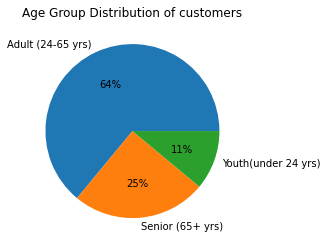

In [11]:
# creating pie chart for age groups
ords_prods_cust_merged_high_activity['Age_Group'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.ylabel(None)
plt.title('Age Group Distribution of customers')

In [12]:
# creating categories based on no. of children in new column
ords_prods_cust_merged_high_activity.loc[ords_prods_cust_merged_high_activity['n_dependants']==0, 'Children']= 'Childless'
ords_prods_cust_merged_high_activity.loc[ords_prods_cust_merged_high_activity['n_dependants']>0, 'Children']= 'With Child'

In [13]:
#cheking frequency of Children column
ords_prods_cust_merged_high_activity['Children'].value_counts(dropna=False)

With Child    23224883
Childless      7739681
Name: Children, dtype: int64

Text(0, 0.5, '')

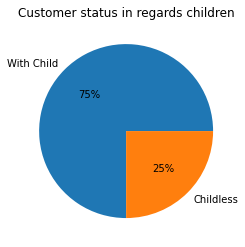

In [14]:
#creating pie chart for children column
ords_prods_cust_merged_high_activity['Children'].value_counts(dropna=False).plot.pie(autopct = '%1.0f%%')
plt.title('Customer status in regards children')
plt.ylabel(None)

In [15]:
# creating income categories in new column
ords_prods_cust_merged_high_activity.loc[ords_prods_cust_merged_high_activity['Income']<=50000, 'Income_flag']= 'Low income customer(under $50k)'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Income'] > 50000) & (ords_prods_cust_merged_high_activity['Income'] <= 150000), 'Income_flag']= 'Mid income customer($50k-150k)'
ords_prods_cust_merged_high_activity.loc[ords_prods_cust_merged_high_activity['Income']>150000, 'Income_flag']= 'High income customer($150k+)'

In [16]:
#cheking frequency of income column
ords_prods_cust_merged_high_activity['Income_flag'].value_counts(dropna=False)

Mid income customer($50k-150k)     23707476
High income customer($150k+)        3894534
Low income customer(under $50k)     3362554
Name: Income_flag, dtype: int64

Text(0, 0.5, '')

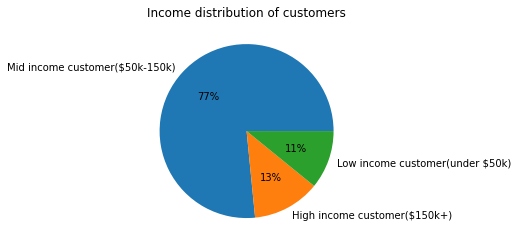

In [17]:
#creating pie chart for income flag
ords_prods_cust_merged_high_activity['Income_flag'].value_counts(dropna=False).plot.pie(autopct = '%1.0f%%')
plt.title('Income distribution of customers')
plt.ylabel(None)

In [18]:
#creating customer profiles in new column
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age_Group'] == 'Youth(under 24 yrs)') & (ords_prods_cust_merged_high_activity['Children'] == 'With Child'), 'Customer_profile']= 'Youth with Child'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age_Group'] == 'Youth(under 24 yrs)') & (ords_prods_cust_merged_high_activity['Children'] == 'Childless'), 'Customer_profile']= 'Childless Youth'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age_Group'] == 'Adult (24-65 yrs)') & (ords_prods_cust_merged_high_activity['Children'] == 'With Child'), 'Customer_profile']= 'Adult with Child'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age_Group'] == 'Adult (24-65 yrs)') & (ords_prods_cust_merged_high_activity['Children'] == 'Childless'), 'Customer_profile']= 'Childless Adult'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age_Group'] == 'Senior (65+ yrs)') & (ords_prods_cust_merged_high_activity['Children'] == 'With Child'), 'Customer_profile']= 'Senior with Child'
ords_prods_cust_merged_high_activity.loc[(ords_prods_cust_merged_high_activity['Age_Group'] == 'Senior (65+ yrs)') & (ords_prods_cust_merged_high_activity['Children'] == 'Childless'), 'Customer_profile']= 'Childless Senior'

In [19]:
#cheking frequency of customer profile
ords_prods_cust_merged_high_activity['Customer_profile'].value_counts(dropna=False).sort_values(ascending=False)

Adult with Child     14810086
Senior with Child     5825113
Childless Adult       5008450
Youth with Child      2589684
Childless Senior      1905721
Childless Youth        825510
Name: Customer_profile, dtype: int64

# <ins>STEP 6</ins>

### Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Number of orders')

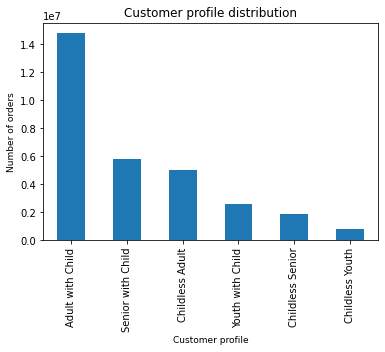

In [20]:
#creating bar chart of customer profiles
q10_bar_profile_distribution = ords_prods_cust_merged_high_activity['Customer_profile'].value_counts(dropna=False).sort_values(ascending=False).plot.bar()
plt.title('Customer profile distribution')
plt.xlabel("Customer profile", fontsize=9)
plt.ylabel("Number of orders",fontsize=9)

In [21]:
#exporting bar chart
q10_bar_profile_distribution.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q10_bar_profile_distribution.png'))

# <ins>STEP 7</ins>

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [22]:
# Usage frequency across profiles
ords_prods_cust_merged_high_activity.groupby('Customer_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                          mean min max
Customer_profile                      
Adult with Child     17.754515   1  99
Childless Adult      18.039601   1  99
Childless Senior     17.823513   1  99
Childless Youth      17.772659   1  99
Senior with Child    17.779937   1  99
Youth with Child     18.041498   1  99

In [23]:
# Expenditure across profiles
ords_prods_cust_merged_high_activity.groupby('Customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
Customer_profile                      
Adult with Child   7.789761  1.0  25.0
Childless Adult    7.787189  1.0  25.0
Childless Senior   7.802276  1.0  25.0
Childless Youth    7.774491  1.0  25.0
Senior with Child  7.791746  1.0  25.0
Youth with Child   7.795841  1.0  25.0

# <ins>STEP 8</ins>

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [24]:
# most frequent departments across customer profiles
ords_prods_cust_merged_high_activity.groupby('Customer_profile').agg({'department_id': pd.Series.mode})

,department_id
Customer_profile,
Adult with Child,4
Childless Adult,4
Childless Senior,4
Childless Youth,4
Senior with Child,4
Youth with Child,4


In [25]:
# customer profiles across departments
crosstab_profile_departments= pd.crosstab(ords_prods_cust_merged_high_activity['Customer_profile'],ords_prods_cust_merged_high_activity['department_id'],dropna=False)

In [26]:
#viewing crosstab
crosstab_profile_departments

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
Customer_profile,,,,,,,,,,,,,,,,,,,,,
Adult with Child,1013626,16385,535560,4342995,68210,122460,1228480,43335,393194,16166,...,322425,853451,320376,484805,2475592,335442,196523,1326991,478249,30973
Childless Adult,341487,5753,183228,1467865,24249,41694,417751,14670,131734,5182,...,106346,287379,109535,163735,837399,110969,67882,447738,165150,10451
Childless Senior,133131,1999,68129,562279,8648,15581,158701,6382,50425,1943,...,41704,109133,39431,60654,318917,42382,24223,170004,61827,3721
Childless Youth,54730,962,30038,245297,3930,7186,68889,2550,22137,875,...,17828,47392,17466,26631,138060,18007,11223,72696,26405,1763
Senior with Child,399399,6351,210329,1706806,26043,47646,487713,17369,155048,6393,...,129069,336041,126060,191286,972122,134045,75939,518470,188636,12184
Youth with Child,179358,2961,93544,754031,13547,21424,210367,8754,69598,2892,...,57409,149309,57982,84963,435092,59012,34602,230507,83567,5676


In [27]:
# customer profiles across departments
crosstab_profile_region= pd.crosstab(ords_prods_cust_merged_high_activity['region_flag'],ords_prods_cust_merged_high_activity['Customer_profile'],dropna=False)

In [28]:
#viewing crosstab
crosstab_profile_region

Customer_profile,Adult with Child,Childless Adult,Childless Senior,Childless Youth,Senior with Child,Youth with Child
region_flag,,,,,,
Midwest,3478455,1191826,448385,182605,1351221,609021
Northeast,2619566,847839,356517,150126,1037973,452664
South,4916392,1680577,612071,289285,1936963,875851
West,3795673,1288208,488748,203494,1498956,652148


<AxesSubplot:xlabel='region_flag'>

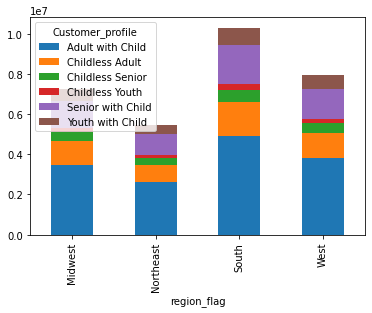

In [29]:
crosstab_profile_region.plot(kind = 'bar', stacked = True)
# creating chart from crosstab profile regions with legend on the right



# ADDITIONAL VISUALISATIONS TO ANSWER KEY QUESTIONS

Q2- Are there particular times of the day when people spend the most money?

Text(0, 0.5, 'Sum of money spent in $')

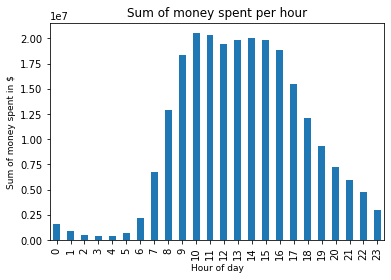

In [6]:
#checking the sum of money(prices) spent across hours
data =ords_prods_cust_merged_high_activity.groupby('order_hour_of_day').agg({'prices': ['sum']})

# plot data in bar chart with disabled legend
q2_most_money_hour=data.plot(kind = 'bar', legend = False)

plt.title('Sum of money spent per hour')
plt.xlabel("Hour of day", fontsize=9)
plt.ylabel("Sum of money spent in $",fontsize=9)

In [7]:
# exporting chart
q2_most_money_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q2_most_money_hour.png'))

Q3.Marketing and sales want to use simpler price range groupings to help direct their efforts.


Text(0, 0.5, '')

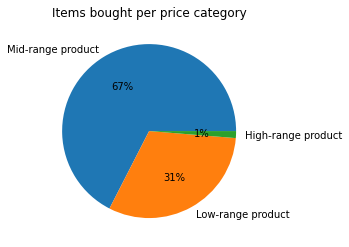

In [32]:
# bar chart for the price categories created earlier
q3_price_ranges_pie=ords_prods_cust_merged_high_activity['price_range_loc'].value_counts(dropna=False).plot.pie(autopct = '%1.0f%%')
plt.title('Items bought per price category')
plt.ylabel(None)

In [33]:
# exporting pie chart
q3_price_ranges_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q3_price_ranges_pie.png'))

Q4 - 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders

In [15]:
#import departments dataset
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','departments_wrangled.csv'))
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
#creating frequency table of departments
df_barchart=ords_prods_cust_merged_high_activity['department_id'].value_counts(dropna=False).sort_values()
df_barchart

10      33451
2       34411
21      64768
8       93060
5      144627
6      255991
18     410392
11     424306
14     670850
12     674781
17     699857
9      822136
20    1003834
15    1012074
3     1120828
13    1782705
1     2121731
7     2571901
19    2766406
16    5177182
4     9079273
Name: department_id, dtype: int64

In [20]:
#joining df_barchart with departments
df_barchart_departments=df_barchart.merge(departments,on='department_id')
df_barchart_departments.head()

AttributeError: 'Series' object has no attribute 'merge'

[Text(0, 0, 'frozen'),
 Text(0, 1, 'other'),
 Text(0, 2, 'bakery'),
 Text(0, 3, 'produce'),
 Text(0, 4, 'alcohol'),
 Text(0, 5, 'international'),
 Text(0, 6, 'beverages'),
 Text(0, 7, 'pets'),
 Text(0, 8, 'dry goods pasta'),
 Text(0, 9, 'bulk'),
 Text(0, 10, 'personal care'),
 Text(0, 11, 'meat seafood'),
 Text(0, 12, 'pantry'),
 Text(0, 13, 'breakfast'),
 Text(0, 14, 'canned goods'),
 Text(0, 15, 'dairy eggs'),
 Text(0, 16, 'household'),
 Text(0, 17, 'babies'),
 Text(0, 18, 'snacks'),
 Text(0, 19, 'deli'),
 Text(0, 20, 'missing')]

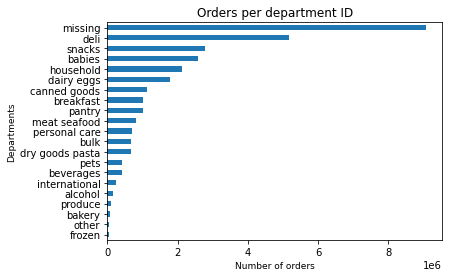

In [5]:
# frequency of orders per department id
q4_bar_frequency_departments=ords_prods_cust_merged_high_activity['department_id'].value_counts(dropna=False).sort_values().plot.barh()
plt.title('Orders per department ID')
plt.ylabel("Departments", fontsize=9)
plt.xlabel("Number of orders",fontsize=9)

#renaming bar categories
q4_bar_frequency_departments.set_yticklabels(['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'], rotation=0, horizontalalignment='right')



In [35]:
# exporting bar chart
q4_bar_frequency_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q4_bar_frequency_departments.png'))

Q5 - What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

Text(0, 0.5, '')

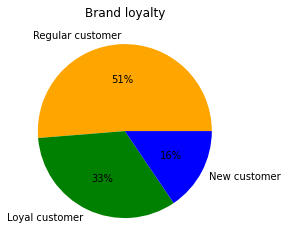

In [36]:
# creating pie chart for brand loyalty
q5_loyalty_pie=ords_prods_cust_merged_high_activity['loyalty_flag'].value_counts(dropna=False).plot.pie(autopct = '%1.0f%%', colors=['orange', 'green', 'blue'])
plt.title('Brand loyalty')
plt.ylabel(None)

In [37]:
#exporting pie chart
q5_loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q5_loyalty_pie.png'))

Q6. Are there differences in ordering habits based on a customer’s loyalty status?


In [27]:
# creating cross tab for days of week based on loyalty
crosstab_dow_loyalty= pd.crosstab(ords_prods_cust_merged_high_activity['orders_day_of_week'],ords_prods_cust_merged_high_activity['loyalty_flag'],dropna=False, normalize='index').round(4)*100

In [39]:
crosstab_dow_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,29.70,16.67,53.63
1,34.06,15.13,50.80
2,33.60,15.54,50.86
3,34.51,15.27,50.21
4,35.64,14.78,49.57
5,36.11,14.57,49.32
6,30.72,16.09,53.19


[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

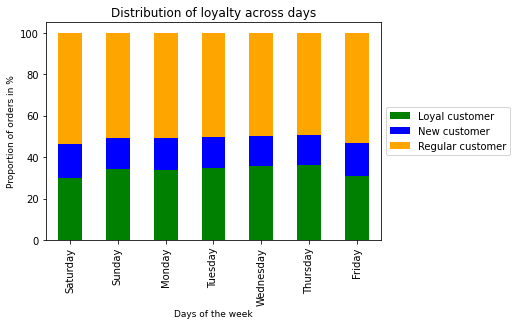

In [37]:
#creating bar chart
q6_bar_dow_loyalty=crosstab_dow_loyalty.plot.bar(stacked=True, color =['green', 'blue', 'orange'])
plt.title('Distribution of loyalty across days')
plt.ylabel("Proportion of orders in %", fontsize=9)
plt.xlabel("Days of the week",fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#renaming bar categories
q6_bar_dow_loyalty.set_xticklabels(['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=90)

In [38]:
#exporting bar chart
q6_bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q6_bar_dow_loyalty.png'),bbox_inches='tight')

In [30]:
#creating crosstab for loyalty status across departments
crosstab_department_loyalty= pd.crosstab(ords_prods_cust_merged_high_activity['department_id'],ords_prods_cust_merged_high_activity['loyalty_flag'],dropna=False, normalize='index').round(4)*100

[Text(0, 0, 'frozen'),
 Text(1, 0, 'other'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'produce'),
 Text(4, 0, 'alcohol'),
 Text(5, 0, 'international'),
 Text(6, 0, 'beverages'),
 Text(7, 0, 'pets'),
 Text(8, 0, 'dry goods pasta'),
 Text(9, 0, 'bulk'),
 Text(10, 0, 'personal care'),
 Text(11, 0, 'meat seafood'),
 Text(12, 0, 'pantry'),
 Text(13, 0, 'breakfast'),
 Text(14, 0, 'canned goods'),
 Text(15, 0, 'dairy eggs'),
 Text(16, 0, 'household'),
 Text(17, 0, 'babies'),
 Text(18, 0, 'snacks'),
 Text(19, 0, 'deli'),
 Text(20, 0, 'missing')]

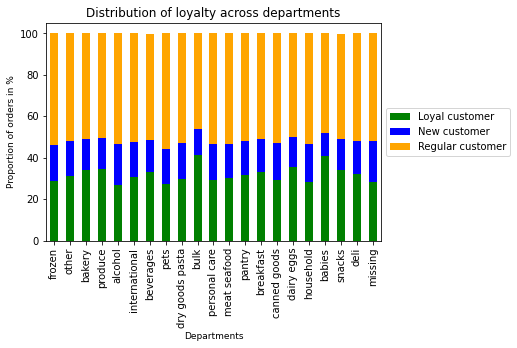

In [34]:
#creating bar chart 
q6_bar_department_loyalty=crosstab_department_loyalty.plot.bar(stacked=True, color =['green', 'blue', 'orange'])
plt.title('Distribution of loyalty across departments')
plt.ylabel("Proportion of orders in %", fontsize=9)
plt.xlabel("Departments",fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#renaming bar categories
q6_bar_department_loyalty.set_xticklabels(['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'], rotation=90)

In [36]:
#exporting bar chart
q6_bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q6_bar_department_loyalty.png'),bbox_inches='tight')

Q7. Are there differences in ordering habits based on a customer’s region?

In [24]:
# creating cross tab for days of week based on region
crosstab_dow_region= pd.crosstab(ords_prods_cust_merged_high_activity['orders_day_of_week'],ords_prods_cust_merged_high_activity['region_flag'],dropna=False, normalize='index').round(4)*100

In [46]:
crosstab_dow_region

region_flag,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,23.53,17.66,33.09,25.71
1,23.35,17.63,33.42,25.60
2,23.54,17.72,33.30,25.44
3,23.31,17.69,33.49,25.50
4,23.49,17.59,33.26,25.66
5,23.39,17.75,33.29,25.57
6,23.54,17.48,33.32,25.66


[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

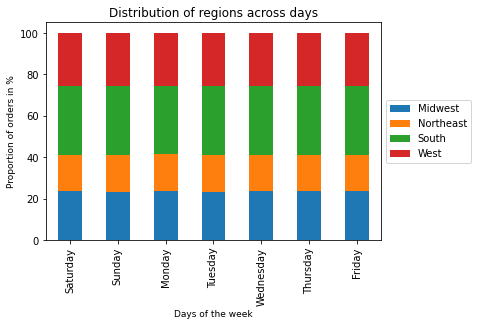

In [40]:
#creating stacked bar chart
q7_bar_dow_region=crosstab_dow_region.plot.bar(stacked= True)
plt.title('Distribution of regions across days')
plt.ylabel("Proportion of orders in %", fontsize=9)
plt.xlabel("Days of the week",fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#renaming bar categories
q7_bar_dow_region.set_xticklabels(['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=90)

In [41]:
#exporting stacked bar chart
q7_bar_dow_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q7_bar_dow_region.png'),bbox_inches='tight')

In [19]:
# creating cross tab for departments based on region
crosstab_department_region= pd.crosstab(ords_prods_cust_merged_high_activity['department_id'],ords_prods_cust_merged_high_activity['region_flag'],dropna=False, normalize='index').round(4)*100

[Text(0, 0, 'frozen'),
 Text(1, 0, 'other'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'produce'),
 Text(4, 0, 'alcohol'),
 Text(5, 0, 'international'),
 Text(6, 0, 'beverages'),
 Text(7, 0, 'pets'),
 Text(8, 0, 'dry goods pasta'),
 Text(9, 0, 'bulk'),
 Text(10, 0, 'personal care'),
 Text(11, 0, 'meat seafood'),
 Text(12, 0, 'pantry'),
 Text(13, 0, 'breakfast'),
 Text(14, 0, 'canned goods'),
 Text(15, 0, 'dairy eggs'),
 Text(16, 0, 'household'),
 Text(17, 0, 'babies'),
 Text(18, 0, 'snacks'),
 Text(19, 0, 'deli'),
 Text(20, 0, 'missing')]

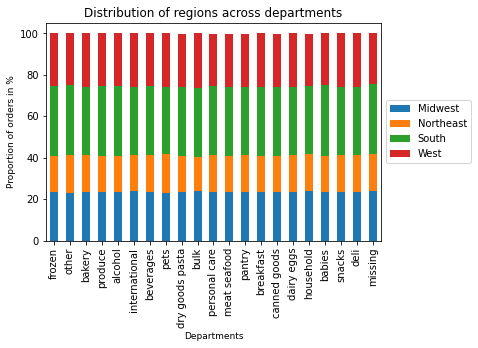

In [42]:
#creating stacked bar chart
q7_bar_department_region=crosstab_department_region.plot.bar(stacked= True)
plt.title('Distribution of regions across departments')
plt.ylabel("Proportion of orders in %", fontsize=9)
plt.xlabel("Departments",fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#renaming bar categories
q7_bar_department_region.set_xticklabels(['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'], rotation=90)

In [43]:
# exporting bar chart
q7_bar_department_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q7_bar_department_region.png'), bbox_inches='tight')

Q8. Is there a connection between age and family status in terms of ordering habits?

In [6]:
# Creating crosstab age vs. spending
crosstab_age_spending= pd.crosstab(ords_prods_cust_merged_high_activity['spending_flag'],ords_prods_cust_merged_high_activity['Age_Group'],dropna=False, normalize='index').round(4)*100

In [53]:
crosstab_age_spending

Age_Group,Adult (24-65 yrs),Senior (65+ yrs),Youth(under 24 yrs)
spending_flag,,,
High Spender,64.76,24.22,11.02
Low Spender,63.99,24.98,11.03


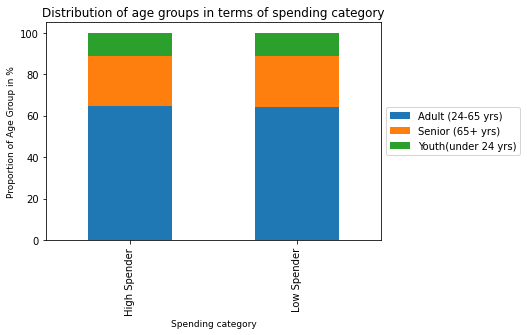

In [13]:
#creating stacked bar chart
q8_bar_age_spending=crosstab_age_spending.plot.bar(stacked= True)
plt.title('Distribution of age groups in terms of spending category')
plt.ylabel("Proportion of Age Group in %", fontsize=9)
plt.xlabel("Spending category",fontsize=9)

#placing legend outside plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [15]:
# exporting bar chart
q8_bar_age_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q8_bar_age_spending.png'),bbox_inches='tight')

In [16]:
# Creating crosstab fam_status vs. spending
crosstab_famstatus_spending= pd.crosstab(ords_prods_cust_merged_high_activity['spending_flag'],ords_prods_cust_merged_high_activity['fam_status'],dropna=False, normalize='index').round(4)*100

In [57]:
crosstab_famstatus_spending

fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High Spender,8.34,4.63,71.16,15.87
Low Spender,8.55,4.79,70.20,16.46


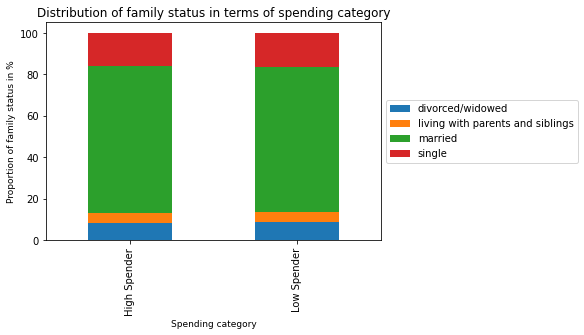

In [17]:
#creating stacked bar chart
q8_bar_famstatus_spending=crosstab_famstatus_spending.plot.bar(stacked= True)
plt.title('Distribution of family status in terms of spending category')
plt.ylabel("Proportion of family status in %", fontsize=9)
plt.xlabel("Spending category",fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [18]:
# exporting bar chart
q8_bar_famstatus_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q8_bar_famstatus_spending.png'), bbox_inches='tight')

Q9.What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


Text(0.5, 1.0, 'Age Group Distribution of customers')

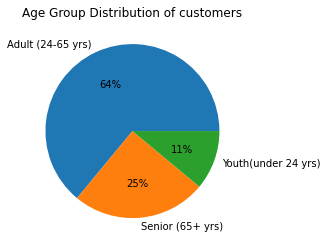

In [60]:
# creating age chart
q9_pie_age=ords_prods_cust_merged_high_activity['Age_Group'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.ylabel(None)
plt.title('Age Group Distribution of customers')

In [61]:
# exporting age chart
q9_pie_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q9_pie_age.png'))

Text(0, 0.5, '')

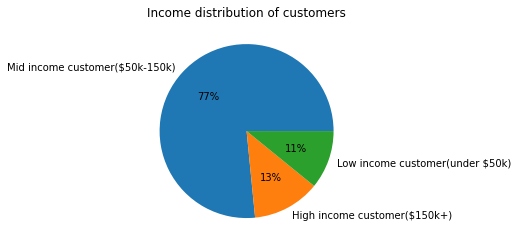

In [62]:
#creating income chart
q9_pie_income=ords_prods_cust_merged_high_activity['Income_flag'].value_counts(dropna=False).plot.pie(autopct = '%1.0f%%')
plt.title('Income distribution of customers')
plt.ylabel(None)

In [63]:
# exporting income chart
q9_pie_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q9_pie_income.png'))

Text(0, 0.5, '')

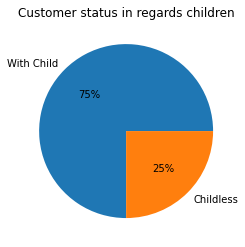

In [64]:
#creating children chart
q9_pie_children=ords_prods_cust_merged_high_activity['Children'].value_counts(dropna=False).plot.pie(autopct = '%1.0f%%')
plt.title('Customer status in regards children')
plt.ylabel(None)

In [65]:
# exporting children chart
q9_pie_children.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'q9_pie_children.png'))

# EXPORTING DATASET WITH NEW COLUMNS FROM THIS NOTEBOOK

In [66]:
ords_prods_cust_merged_high_activity_FINAL=ords_prods_cust_merged_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merged_high_activity_FINAL.pkl'))